### Проведем первичный анализ просмотров

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
views = pd.read_csv('views.csv')
views

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825
3,37703,test,[2842 1949 162 1588 6794],1654030826
4,14661,test,[2395 5881 5648 3417 673],1654030829
...,...,...,...,...
193290,158267,test,[1733 6834 4380 1915 1627],1655240340
193291,63527,control,[2454 191 3873 6404 1588],1655240347
193292,52169,test,[1368 1709 1616 798 5305],1655240354
193293,142402,test,[5895 6984 1978 6548 6106],1655240373


### Проверим вхождение пользователей в обе группы и удалим таких, если есть

In [3]:
control = views[(views['exp_group'] == 'control')]
control

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
10,155358,control,[4889 3374 1344 6754 2419],1654030871
11,157618,control,[2529 1755 5769 992 1326],1654030872
13,20451,control,[4940 1264 4497 1416 5421],1654030877
14,147602,control,[2839 1537 2696 4613 2811],1654030880
...,...,...,...,...
193284,43854,control,[4916 2356 4721 1201 4194],1655240314
193285,3615,control,[1578 6326 906 2833 993],1655240322
193289,18833,control,[1367 7074 5344 6597 5120],1655240338
193291,63527,control,[2454 191 3873 6404 1588],1655240347


In [4]:
test = views[views['exp_group'] == 'test']
test

,user_id,exp_group,recommendations,timestamp
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825
3,37703,test,[2842 1949 162 1588 6794],1654030826
4,14661,test,[2395 5881 5648 3417 673],1654030829
5,140763,test,[5812 2419 5174 5640 6840],1654030834
...,...,...,...,...
193287,63448,test,[5973 3561 2374 6387 4015],1655240331
193288,119630,test,[3143 599 4588 1577 7077],1655240337
193290,158267,test,[1733 6834 4380 1915 1627],1655240340
193292,52169,test,[1368 1709 1616 798 5305],1655240354


In [5]:
# 8 пользователей контрольный группы попали и в тестовую группу
(control['user_id'].isin(test['user_id'])).value_counts()

False    96370
True         8
Name: user_id, dtype: int64

In [6]:
# 19 пользователей тестовой группы попали и в контрольную группу
(test['user_id'].isin(control['user_id'])).value_counts()

False    96898
True        19
Name: user_id, dtype: int64

### Найдем индексы двойных агентов в обоих группах и по индексам удалим

In [7]:
df_c = (control['user_id'].isin(test['user_id'])).to_frame()
ids_c = df_c.index[df_c['user_id'] == True].tolist()
ids_c

[6179, 45925, 82515, 100929, 129374, 145119, 163129, 177552]

In [8]:
df_t = (test['user_id'].isin(control['user_id'])).to_frame()
ids_t = df_t.index[df_t['user_id'] == True].tolist()
ids_t

[1311,
 29724,
 30748,
 39653,
 39787,
 41040,
 46348,
 87340,
 100158,
 102601,
 117468,
 121023,
 124435,
 133592,
 155144,
 158581,
 158674,
 168931,
 178457]

In [9]:
control = control.drop(index=ids_c).reset_index(drop=True)
control

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,155358,control,[4889 3374 1344 6754 2419],1654030871
2,157618,control,[2529 1755 5769 992 1326],1654030872
3,20451,control,[4940 1264 4497 1416 5421],1654030877
4,147602,control,[2839 1537 2696 4613 2811],1654030880
...,...,...,...,...
96365,43854,control,[4916 2356 4721 1201 4194],1655240314
96366,3615,control,[1578 6326 906 2833 993],1655240322
96367,18833,control,[1367 7074 5344 6597 5120],1655240338
96368,63527,control,[2454 191 3873 6404 1588],1655240347


In [10]:
test = test.drop(index=ids_t).reset_index(drop=True)
test

,user_id,exp_group,recommendations,timestamp
0,146885,test,[1399 1076 797 7015 5942],1654030811
1,50948,test,[2315 3037 1861 6567 4093],1654030825
2,37703,test,[2842 1949 162 1588 6794],1654030826
3,14661,test,[2395 5881 5648 3417 673],1654030829
4,140763,test,[5812 2419 5174 5640 6840],1654030834
...,...,...,...,...
96893,63448,test,[5973 3561 2374 6387 4015],1655240331
96894,119630,test,[3143 599 4588 1577 7077],1655240337
96895,158267,test,[1733 6834 4380 1915 1627],1655240340
96896,52169,test,[1368 1709 1616 798 5305],1655240354


### Посмотрим количество уникальных пользователей в группах

In [11]:
control['user_id'].nunique()

32350

In [12]:
test['user_id'].nunique()

32659

In [13]:
# примерно равное соотношение

In [14]:
df_views = pd.concat([control, test], axis=0).reset_index(drop=True)
df_views

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,155358,control,[4889 3374 1344 6754 2419],1654030871
2,157618,control,[2529 1755 5769 992 1326],1654030872
3,20451,control,[4940 1264 4497 1416 5421],1654030877
4,147602,control,[2839 1537 2696 4613 2811],1654030880
...,...,...,...,...
193263,63448,test,[5973 3561 2374 6387 4015],1655240331
193264,119630,test,[3143 599 4588 1577 7077],1655240337
193265,158267,test,[1733 6834 4380 1915 1627],1655240340
193266,52169,test,[1368 1709 1616 798 5305],1655240354


In [15]:
df_users = df_views.groupby(['user_id', 'exp_group'], as_index=False).agg(recs=('exp_group', 'count'))
df_users

,user_id,exp_group,recs
0,200,test,1
1,201,test,6
2,202,test,1
3,212,test,3
4,213,test,5
...,...,...,...
65004,168538,test,3
65005,168541,control,2
65006,168544,test,1
65007,168545,test,4


### Проведем первичный анализ лайков

In [16]:
likes = pd.read_csv('likes.csv')
likes

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828
3,14661,673,1654030831
4,37703,1588,1654030833
...,...,...,...
230171,31851,5964,1655243535
230172,51512,1498,1655243537
230173,34017,5009,1655243573
230174,13267,1787,1655243692


### Посчитаем количество лайков каждым пользователем

In [17]:
df_likes_per_user = likes.groupby('user_id', as_index=False).agg(likes=('post_id', 'count'))
df_likes_per_user

,user_id,likes
0,200,1
1,201,3
2,202,2
3,212,4
4,213,7
...,...,...
58166,168525,2
58167,168532,4
58168,168538,5
58169,168541,2


### Смерджим лайки и пользователей в один датасет и посмотрим долю пользователей сделавших >= 1 лайка

In [18]:
merged = df_users.merge(df_likes_per_user, on='user_id', how='left')
merged = merged.fillna(0)

In [19]:
round(merged[merged.likes != 0].shape[0] / merged.shape[0], 3)

0.895

In [20]:
merged

,user_id,exp_group,recs,likes
0,200,test,1,1.0
1,201,test,6,3.0
2,202,test,1,2.0
3,212,test,3,4.0
4,213,test,5,7.0
...,...,...,...,...
65004,168538,test,3,5.0
65005,168541,control,2,2.0
65006,168544,test,1,0.0
65007,168545,test,4,5.0


### Оценим, различаются ли число лайков между группами. Проверим две метрики: доля пользователей с хотя бы одним лайком, число лайков на пользователя.

In [21]:
merged_test = merged[merged['exp_group'] == 'test']
merged_control = merged[merged['exp_group'] == 'control']

In [22]:
test_part = merged_test[merged['likes'] != 0].shape[0] / merged_test.shape[0]
test_part

0.8981597721914327

In [23]:
control_part = merged_control[merged['likes'] != 0].shape[0] / merged_control.shape[0]
control_part

0.8913137557959815

In [24]:
merged_test

,user_id,exp_group,recs,likes
0,200,test,1,1.0
1,201,test,6,3.0
2,202,test,1,2.0
3,212,test,3,4.0
4,213,test,5,7.0
...,...,...,...,...
65000,168521,test,6,3.0
65003,168532,test,5,4.0
65004,168538,test,3,5.0
65006,168544,test,1,0.0


<AxesSubplot:>

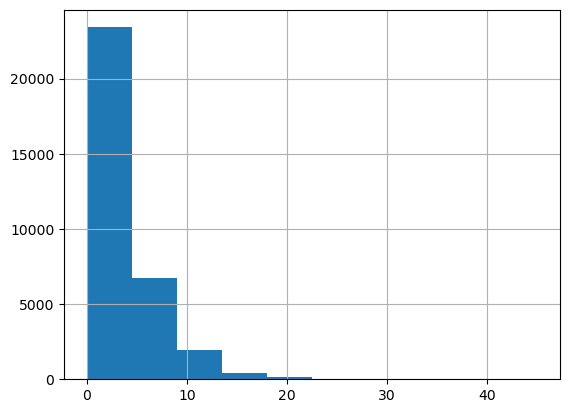

In [25]:
merged_test.likes.hist()

In [26]:
merged_control

,user_id,exp_group,recs,likes
6,217,control,2,4.0
7,221,control,6,5.0
9,229,control,4,3.0
10,233,control,2,3.0
11,234,control,3,4.0
...,...,...,...,...
64999,168519,control,1,0.0
65001,168525,control,2,2.0
65002,168526,control,1,0.0
65005,168541,control,2,2.0


<AxesSubplot:>

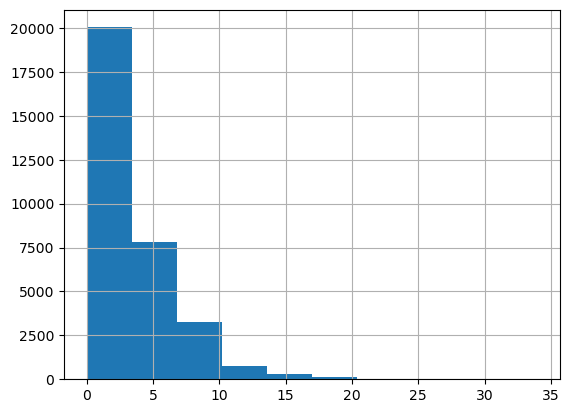

In [27]:
merged_control.likes.hist()

In [28]:
from scipy.stats import mannwhitneyu

mannwhitneyu(test_part, control_part)

MannwhitneyuResult(statistic=1.0, pvalue=1.0)

In [29]:
from scipy.stats import mannwhitneyu

mannwhitneyu(merged_test.likes, merged_control.likes)

MannwhitneyuResult(statistic=538160577.0, pvalue=2.9585062792441964e-05)

### Посчитаем hitrate - долю рекомендаций, по которым пользователи сделали лайк

In [30]:
df_views['recs_time'] = pd.to_datetime(df_views.timestamp, unit='s')
df_views = df_views.drop('timestamp', axis=1)
df_views

,user_id,exp_group,recommendations,recs_time
0,128381,control,[3644 4529 4704 5294 4808],2022-05-31 21:00:03
1,155358,control,[4889 3374 1344 6754 2419],2022-05-31 21:01:11
2,157618,control,[2529 1755 5769 992 1326],2022-05-31 21:01:12
3,20451,control,[4940 1264 4497 1416 5421],2022-05-31 21:01:17
4,147602,control,[2839 1537 2696 4613 2811],2022-05-31 21:01:20
...,...,...,...,...
193263,63448,test,[5973 3561 2374 6387 4015],2022-06-14 20:58:51
193264,119630,test,[3143 599 4588 1577 7077],2022-06-14 20:58:57
193265,158267,test,[1733 6834 4380 1915 1627],2022-06-14 20:59:00
193266,52169,test,[1368 1709 1616 798 5305],2022-06-14 20:59:14


In [31]:
likes['like_time'] = pd.to_datetime(likes.timestamp, unit='s')
likes = likes.drop('timestamp', axis=1)
likes

,user_id,post_id,like_time
0,128381,4704,2022-05-31 21:00:04
1,146885,1399,2022-05-31 21:00:16
2,50948,2315,2022-05-31 21:00:28
3,14661,673,2022-05-31 21:00:31
4,37703,1588,2022-05-31 21:00:33
...,...,...,...
230171,31851,5964,2022-06-14 21:52:15
230172,51512,1498,2022-06-14 21:52:17
230173,34017,5009,2022-06-14 21:52:53
230174,13267,1787,2022-06-14 21:54:52


In [32]:
# создадим датасет рекомендаций на каждый сделанный лайк
recs = df_views.merge(likes, on='user_id', how='left')[['user_id', 'exp_group', 'recommendations', 'recs_time', 'like_time', 'post_id']]

In [33]:
recs.post_id.fillna(0, inplace=True)

In [34]:
recs.post_id = recs.post_id.astype(int).astype(str)
recs

,user_id,exp_group,recommendations,recs_time,like_time,post_id
0,128381,control,[3644 4529 4704 5294 4808],2022-05-31 21:00:03,2022-05-31 21:00:04,4704
1,128381,control,[3644 4529 4704 5294 4808],2022-05-31 21:00:03,2022-05-31 21:00:38,5294
2,128381,control,[3644 4529 4704 5294 4808],2022-05-31 21:00:03,2022-06-12 15:55:27,3608
3,128381,control,[3644 4529 4704 5294 4808],2022-05-31 21:00:03,2022-06-12 15:55:42,2542
4,128381,control,[3644 4529 4704 5294 4808],2022-05-31 21:00:03,2022-06-12 16:53:26,4165
...,...,...,...,...,...,...
1016884,119630,test,[3143 599 4588 1577 7077],2022-06-14 20:58:57,2022-06-14 20:59:27,599
1016885,158267,test,[1733 6834 4380 1915 1627],2022-06-14 20:59:00,2022-06-10 06:40:33,329
1016886,158267,test,[1733 6834 4380 1915 1627],2022-06-14 20:59:00,2022-06-14 20:59:01,6834
1016887,52169,test,[1368 1709 1616 798 5305],2022-06-14 20:59:14,2022-06-14 20:59:29,1709


In [35]:
# колонку рекомендаций трансформируем в list
recs['recommendations'] = recs['recommendations'].str.replace('[', '').str.replace(']', '').str.split()
recs

,user_id,exp_group,recommendations,recs_time,like_time,post_id
0,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-05-31 21:00:04,4704
1,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-05-31 21:00:38,5294
2,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-06-12 15:55:27,3608
3,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-06-12 15:55:42,2542
4,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-06-12 16:53:26,4165
...,...,...,...,...,...,...
1016884,119630,test,"[3143, 599, 4588, 1577, 7077]",2022-06-14 20:58:57,2022-06-14 20:59:27,599
1016885,158267,test,"[1733, 6834, 4380, 1915, 1627]",2022-06-14 20:59:00,2022-06-10 06:40:33,329
1016886,158267,test,"[1733, 6834, 4380, 1915, 1627]",2022-06-14 20:59:00,2022-06-14 20:59:01,6834
1016887,52169,test,"[1368, 1709, 1616, 798, 5305]",2022-06-14 20:59:14,2022-06-14 20:59:29,1709


In [36]:
#напишем функцию, определяющую был ли сделан лайк в промежуток +1 час после выдачи рекомендации
from datetime import timedelta

def get_post(recs, post_id, recom_time, like_time):
    if post_id =='0':
        return 0
    elif like_time > recom_time + timedelta(hours=1):
        return 0
    elif post_id in recs:
        return 1
    else:
        return 0

### Посмотрим сколько лайков после рекомендации попадают в промежуток до +1 часа

In [37]:
recs[(recs['like_time'] > recs['recs_time']) & (recs['like_time'] <= (recs['recs_time'] + timedelta(hours=1)))]

,user_id,exp_group,recommendations,recs_time,like_time,post_id
0,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-05-31 21:00:04,4704
1,128381,control,"[3644, 4529, 4704, 5294, 4808]",2022-05-31 21:00:03,2022-05-31 21:00:38,5294
14,20451,control,"[4940, 1264, 4497, 1416, 5421]",2022-05-31 21:01:17,2022-05-31 21:01:21,5421
20,147602,control,"[2839, 1537, 2696, 4613, 2811]",2022-05-31 21:01:20,2022-05-31 21:04:33,2811
24,66389,control,"[1243, 403, 1368, 2607, 1852]",2022-05-31 21:01:32,2022-05-31 21:01:33,1368
...,...,...,...,...,...,...
1016882,28169,test,"[1399, 1231, 5552, 2309, 5583]",2022-06-14 20:58:44,2022-06-14 20:58:48,5583
1016884,119630,test,"[3143, 599, 4588, 1577, 7077]",2022-06-14 20:58:57,2022-06-14 20:59:27,599
1016886,158267,test,"[1733, 6834, 4380, 1915, 1627]",2022-06-14 20:59:00,2022-06-14 20:59:01,6834
1016887,52169,test,"[1368, 1709, 1616, 798, 5305]",2022-06-14 20:59:14,2022-06-14 20:59:29,1709


### Построим таблицу учитывая относится ли лайк к рекомендации

In [38]:
clean_recs = recs.copy()

In [39]:
clean_recs['target'] = clean_recs.apply(lambda x: get_post(x['recommendations'], x['post_id'], x['recs_time'], x['like_time']), axis=1)

In [40]:
clean_recs['recommendations'] = clean_recs['recommendations'].astype(str)
clean_recs

,user_id,exp_group,recommendations,recs_time,like_time,post_id,target
0,128381,control,"['3644', '4529', '4704', '5294', '4808']",2022-05-31 21:00:03,2022-05-31 21:00:04,4704,1
1,128381,control,"['3644', '4529', '4704', '5294', '4808']",2022-05-31 21:00:03,2022-05-31 21:00:38,5294,1
2,128381,control,"['3644', '4529', '4704', '5294', '4808']",2022-05-31 21:00:03,2022-06-12 15:55:27,3608,0
3,128381,control,"['3644', '4529', '4704', '5294', '4808']",2022-05-31 21:00:03,2022-06-12 15:55:42,2542,0
4,128381,control,"['3644', '4529', '4704', '5294', '4808']",2022-05-31 21:00:03,2022-06-12 16:53:26,4165,0
...,...,...,...,...,...,...,...
1016884,119630,test,"['3143', '599', '4588', '1577', '7077']",2022-06-14 20:58:57,2022-06-14 20:59:27,599,1
1016885,158267,test,"['1733', '6834', '4380', '1915', '1627']",2022-06-14 20:59:00,2022-06-10 06:40:33,329,0
1016886,158267,test,"['1733', '6834', '4380', '1915', '1627']",2022-06-14 20:59:00,2022-06-14 20:59:01,6834,1
1016887,52169,test,"['1368', '1709', '1616', '798', '5305']",2022-06-14 20:59:14,2022-06-14 20:59:29,1709,1


In [41]:
targets = clean_recs.groupby(['user_id', 'exp_group', 'recommendations'], as_index=False).agg(target=('target', 'max'))
targets

,user_id,exp_group,recommendations,target
0,200,test,"['5559', '5510', '4127', '5135', '1563']",1
1,201,test,"['384', '371', '1420', '5994', '370']",0
2,201,test,"['4962', '6881', '2631', '643', '6168']",1
3,201,test,"['5094', '4616', '2461', '138', '1467']",0
4,201,test,"['6167', '1905', '1134', '3401', '6068']",1
...,...,...,...,...
193263,168545,test,"['1306', '3060', '4732', '4887', '3178']",1
193264,168545,test,"['3168', '1167', '659', '6383', '6848']",1
193265,168545,test,"['5115', '983', '2152', '591', '2970']",1
193266,168552,control,"['1566', '2670', '3584', '3643', '901']",0


In [42]:
targets.target.value_counts()

1    137970
0     55298
Name: target, dtype: int64

In [43]:
print(f'Доля показов с хотя бы 1 лайком (hitrate): {round(targets[targets.target == 1].shape[0] / targets.shape[0], 2)}')

Доля показов с хотя бы 1 лайком (hitrate): 0.71


### Посчитаем групповой hitrate (CTR) до бакетирования

In [44]:
targets_control = targets[targets.exp_group == 'control']

In [45]:
targets_test = targets[targets.exp_group == 'test']

In [46]:
print(f'CTR control до бакетирования: {round(targets_control[targets_control.target == 1].shape[0] / targets_control.shape[0], 2)}')

CTR control до бакетирования: 0.71


In [47]:
print(f'CTR test до бакетирования: {round(targets_test[targets_test.target == 1].shape[0] / targets_test.shape[0], 2)}')

CTR test до бакетирования: 0.72


### Посчитаем групповой hitrate (CTR) — доля hitrate по группе/бакету

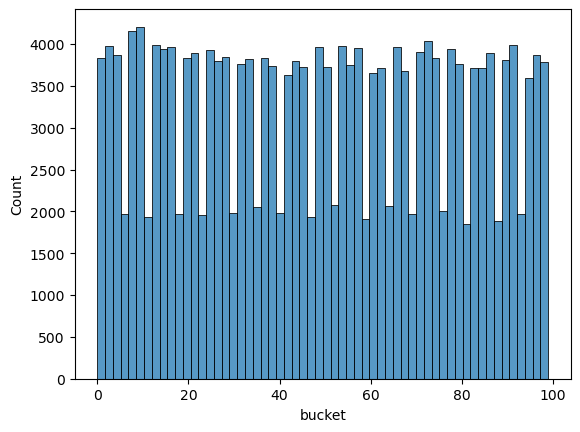

In [48]:
import hashlib

targets['bucket'] = targets['user_id'].apply(
    lambda x: int(hashlib.md5((str(x) + 'super_salt').encode()).hexdigest(), 16) % 100
)
sns.histplot(targets.bucket)
plt.show()

In [49]:
hitrate = targets.groupby(['exp_group', 'bucket'], as_index=False).agg(hitrate=('target', 'mean'))
hitrate

,exp_group,bucket,hitrate
0,control,0,0.660377
1,control,1,0.737945
2,control,2,0.720231
3,control,3,0.681298
4,control,4,0.722222
...,...,...,...
195,test,95,0.713823
196,test,96,0.720859
197,test,97,0.701980
198,test,98,0.716418


In [50]:
hitrate_control = hitrate[hitrate['exp_group'] == 'control']
hitrate_control

,exp_group,bucket,hitrate
0,control,0,0.660377
1,control,1,0.737945
2,control,2,0.720231
3,control,3,0.681298
4,control,4,0.722222
...,...,...,...
95,control,95,0.717762
96,control,96,0.709529
97,control,97,0.693452
98,control,98,0.680514


In [51]:
hitrate_test = hitrate[hitrate['exp_group'] == 'test']
hitrate_test

,exp_group,bucket,hitrate
100,test,0,0.711253
101,test,1,0.742625
102,test,2,0.720085
103,test,3,0.718722
104,test,4,0.696281
...,...,...,...
195,test,95,0.713823
196,test,96,0.720859
197,test,97,0.701980
198,test,98,0.716418


In [52]:
mannwhitneyu(hitrate_control.hitrate, hitrate_test.hitrate) # стат. значимое изменение есть

MannwhitneyuResult(statistic=2877.5, pvalue=2.1615515984624345e-07)

In [53]:
from scipy.stats import ttest_ind

ttest_ind(hitrate_control.hitrate, hitrate_test.hitrate) # стат. значимое изменение есть

Ttest_indResult(statistic=-5.605918937238411, pvalue=6.888984291763849e-08)

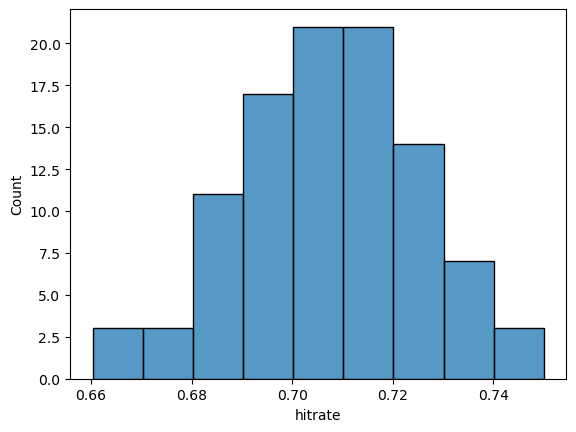

In [54]:
sns.histplot(hitrate_control.hitrate)
plt.show()

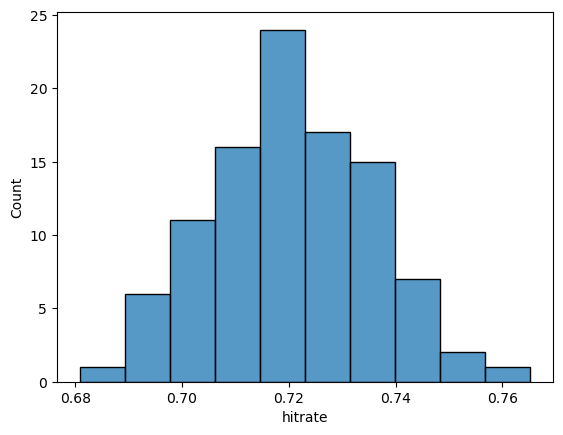

In [55]:
sns.histplot(hitrate_test.hitrate)
plt.show()